## 필수과제 1.1
### Event 에 대한 유저들의 퍼널율 계산
* 전체 기간에 대한 Event type 별 funnel 단계별 전환율 산출하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df1 = pd.read_csv("../dataset/2019-Oct.csv")
df2 = pd.read_csv("../dataset/2019-Nov.csv")
df3 = pd.read_csv("../dataset/2019-Dec.csv")
print(df1.shape, df2.shape, df3.shape)
df3.info()

(4102283, 9) (4635837, 9) (3533286, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [3]:
df3.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [4]:
df3['event_type'].value_counts()

event_type
view                1728331
cart                 927124
remove_from_cart     664655
purchase             213176
Name: count, dtype: int64

In [5]:
print(df1.isnull().sum()/df1.shape[0])
print(df2.isnull().sum()/df2.shape[0])
print(df3.isnull().sum()/df3.shape[0])

event_time       0.000000
event_type       0.000000
product_id       0.000000
category_id      0.000000
category_code    0.983551
brand            0.404473
price            0.000000
user_id          0.000000
user_session     0.000155
dtype: float64
event_time       0.000000
event_type       0.000000
product_id       0.000000
category_id      0.000000
category_code    0.983660
brand            0.428408
price            0.000000
user_id          0.000000
user_session     0.000175
dtype: float64
event_time       0.000000
event_type       0.000000
product_id       0.000000
category_id      0.000000
category_code    0.983453
brand            0.427446
price            0.000000
user_id          0.000000
user_session     0.000220
dtype: float64


In [6]:
def prc_datetime(df):
    df['event_time'] = pd.to_datetime(df['event_time'])
    df['event_date'] = df['event_time'].dt.date
    return df

def get_daily_event_agg_info(df):
    daily_funnel_cohort = df.groupby(['event_date','event_type'])['user_id'].nunique().unstack(fill_value=0)
    daily_funnel_cohort['view_to_cart_ratio'] = (daily_funnel_cohort['cart'] / daily_funnel_cohort['view']*100).round(2)
    daily_funnel_cohort['cart_to_purchase_ratio'] = (daily_funnel_cohort['purchase'] / daily_funnel_cohort['cart']*100).round(2)
    daily_funnel_cohort['view_to_purchase_ratio'] = (daily_funnel_cohort['purchase'] / daily_funnel_cohort['view']*100).round(2)
    return daily_funnel_cohort

In [7]:
df1 = prc_datetime(df1)
df2 = prc_datetime(df2)
df3 = prc_datetime(df3)

oct_daily_event_agg = get_daily_event_agg_info(df1)
nov_daily_event_agg = get_daily_event_agg_info(df2)
dec_daily_event_agg = get_daily_event_agg_info(df3)

In [8]:
oct_daily_event_agg

event_type,cart,purchase,remove_from_cart,view,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio
event_date,,,,,,,
2019-10-01,7676,1001,2562,18392,41.74,13.04,5.44
2019-10-02,22133,1045,2633,32954,67.16,4.72,3.17
2019-10-03,4804,1048,2522,15468,31.06,21.82,6.78
2019-10-04,3891,892,2265,13932,27.93,22.92,6.40
2019-10-05,4617,708,1935,14320,32.24,15.33,4.94
2019-10-06,19466,834,2385,30635,63.54,4.28,2.72
2019-10-07,13426,1116,2914,25424,52.81,8.31,4.39
2019-10-08,7475,1038,2708,19211,38.91,13.89,5.40
2019-10-09,4748,1057,2768,17209,27.59,22.26,6.14


In [9]:
nov_daily_event_agg

event_type,cart,purchase,remove_from_cart,view,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio
event_date,,,,,,,
2019-11-01,3899,913,2313,14127,27.60,23.42,6.46
2019-11-02,3755,818,2185,13919,26.98,21.78,5.88
2019-11-03,4052,888,2361,14848,27.29,21.92,5.98
2019-11-04,4353,945,2680,15384,28.30,21.71,6.14
2019-11-05,4838,1021,2850,17655,27.40,21.10,5.78
2019-11-06,4690,1051,2775,16851,27.83,22.41,6.24
2019-11-07,6034,1590,3744,18410,32.78,26.35,8.64
2019-11-08,5172,1566,3210,16870,30.66,30.28,9.28
2019-11-09,3868,715,2146,14939,25.89,18.49,4.79


In [10]:
dec_daily_event_agg

event_type,cart,purchase,remove_from_cart,view,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio
event_date,,,,,,,
2019-12-01,4164,825,2472,16662,24.99,19.81,4.95
2019-12-02,4618,1014,2669,18434,25.05,21.96,5.50
2019-12-03,4449,981,2601,17888,24.87,22.05,5.48
2019-12-04,4720,1039,2657,17926,26.33,22.01,5.80
2019-12-05,4407,964,2511,17285,25.50,21.87,5.58
2019-12-06,4152,924,2328,16093,25.80,22.25,5.74
2019-12-07,3678,747,2080,14812,24.83,20.31,5.04
2019-12-08,4210,842,2395,16043,26.24,20.00,5.25
2019-12-09,5228,1119,3044,18739,27.90,21.40,5.97


In [11]:
oct_daily_event_agg[['view_to_cart_ratio', 'cart_to_purchase_ratio', 'view_to_purchase_ratio']].describe()

event_type,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio
count,31.000000,31.000000,31.000000
mean,31.502581,19.520000,5.633871
std,10.668396,5.325423,0.935898
min,24.970000,4.280000,2.720000
25%,26.510000,20.155000,5.420000
50%,27.320000,21.850000,5.890000
75%,28.755000,22.305000,6.260000
max,67.160000,24.070000,6.780000


In [12]:
nov_daily_event_agg[['view_to_cart_ratio', 'cart_to_purchase_ratio', 'view_to_purchase_ratio']].describe()

event_type,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio
count,30.000000,30.000000,30.000000
mean,28.934333,23.308000,6.820000
std,3.374902,3.656599,1.718522
min,24.360000,18.140000,4.550000
25%,27.102500,21.027500,5.785000
50%,27.745000,21.985000,6.165000
75%,30.340000,25.262500,8.447500
max,39.670000,34.500000,10.620000


In [13]:
dec_daily_event_agg[['view_to_cart_ratio', 'cart_to_purchase_ratio', 'view_to_purchase_ratio']].describe()

event_type,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio
count,31.000000,31.000000,31.000000
mean,24.141290,22.790645,5.538387
std,2.546556,2.616234,0.980405
min,15.280000,15.420000,2.560000
25%,23.355000,21.775000,5.155000
50%,24.830000,22.890000,5.740000
75%,25.615000,24.955000,6.190000
max,27.900000,26.640000,6.820000


In [14]:
total_event_agg = pd.concat([oct_daily_event_agg, nov_daily_event_agg, dec_daily_event_agg])
total_event_agg[['view_to_cart_ratio', 'cart_to_purchase_ratio', 'view_to_purchase_ratio']].describe()

event_type,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio
count,92.000000,92.000000,92.000000
mean,28.184674,21.857283,5.988478
std,7.265936,4.326494,1.373534
min,15.280000,4.280000,2.560000
25%,25.115000,20.872500,5.430000
50%,26.905000,22.080000,5.920000
75%,28.232500,23.725000,6.330000
max,67.160000,34.500000,10.620000


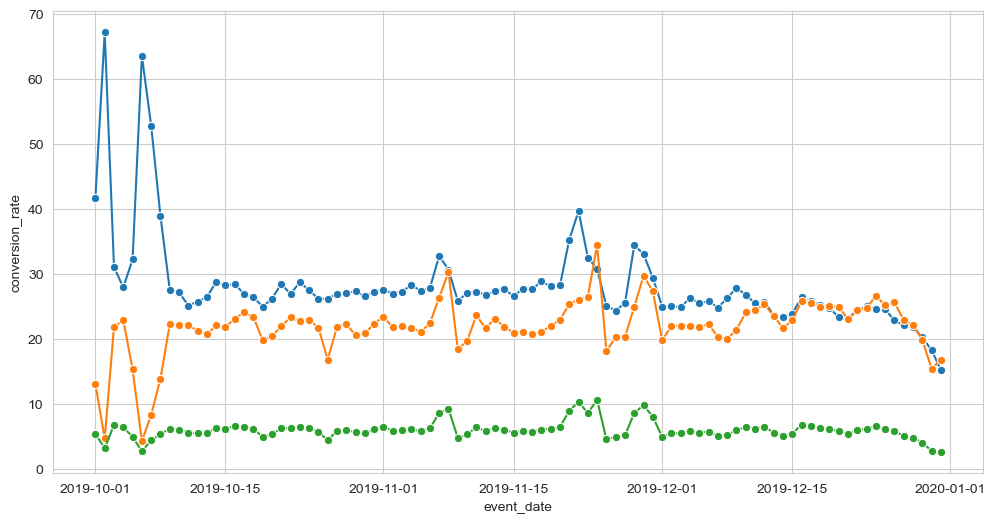

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=total_event_agg , x='event_date', y='view_to_cart_ratio', marker='o')
sns.lineplot(data=total_event_agg , x='event_date', y='cart_to_purchase_ratio', marker='o')
sns.lineplot(data=total_event_agg , x='event_date', y='view_to_purchase_ratio', marker='o')
plt.ylabel('conversion_rate')
plt.show()

In [29]:
total_event_agg.to_pickle('../dataset/total_event_agg.pkl')